In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import KNNImputer
from modul import*
import plotly.express as px

In [2]:
!python3 -m pip freeze >> requirements.txt

In [3]:
crudedf = pd.read_csv('Databases/dados_A215_H_2008-06-13_2024-01-01.csv',header = 9,sep = ';')


In [4]:
crudedf['Data Medicao'] = pd.to_datetime(crudedf['Data Medicao'])
crudedf['Hora Medicao'] = pd.to_datetime(crudedf['Hora Medicao'])
# if crudedf.dtypes.items() == 'object':
#     for i in df_preprocessing.columns:
#         df_preprocessing[str(i)] = df_preprocessing[str(i)].str.replace(',','.').astype(float)

for i, j in crudedf.dtypes.items():
        if j == 'object':
            crudedf[i] = crudedf[i].str.replace(',', '.').astype(float)

In [5]:
df_preenchido = crudedf
data = df_preenchido.pop('Data Medicao')
hora = df_preenchido.pop('Hora Medicao')
unnamed = df_preenchido.pop('Unnamed: 22')

In [6]:
df_interpolado = interpolar_valores(df_preenchido)

In [7]:
crudedf.describe()

,"PRECIPITACAO TOTAL, HORARIO(mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA(mB)","PRESSAO ATMOSFERICA REDUZIDA NIVEL DO MAR, AUT(mB)",PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT)(mB),PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT)(mB),RADIACAO GLOBAL(Kj/m²),TEMPERATURA DA CPU DA ESTACAO(°C),"TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)",TEMPERATURA DO PONTO DE ORVALHO(°C),TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C),TEMPERATURA MINIMA NA HORA ANT. (AUT)(°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT)(°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT)(°C),TENSAO DA BATERIA DA ESTACAO(V),UMIDADE REL. MAX. NA HORA ANT. (AUT)(%),UMIDADE REL. MIN. NA HORA ANT. (AUT)(%),"UMIDADE RELATIVA DO AR, HORARIA(%)","VENTO, DIRECAO HORARIA (gr)(° (gr))","VENTO, RAJADA MAXIMA(m/s)","VENTO, VELOCIDADE HORARIA(m/s)"
count,101937.000000,104335.000000,104334.000000,104229.000000,104229.000000,98249.000000,110645.000000,110642.000000,110599.000000,110467.000000,110468.000000,110451.000000,110378.000000,110643.000000,110451.000000,110343.000000,110582.000000,107180.000000,110400.000000,110618.000000
mean,0.255942,1008.806774,1011.642444,1009.075005,1008.535614,738.408279,29.085806,27.334129,22.229556,27.783861,26.921118,22.769804,21.753360,12.475616,77.280794,72.578532,74.892514,81.590493,6.863724,2.280106
std,1.608940,1.939445,1.945852,1.930899,1.926494,1013.423515,2.582204,1.916918,2.424826,2.058678,1.799569,2.098062,2.662116,0.564479,11.010264,12.749251,12.075155,51.919914,3.001218,1.798943
min,0.000000,1001.800000,1004.595241,1002.000000,1001.800000,-3.540000,22.000000,20.000000,-10.000000,20.400000,0.000000,-10.000000,-10.000000,0.000000,8.000000,10.000000,10.000000,1.000000,0.000000,0.000000
25%,0.000000,1007.400000,1010.244740,1007.700000,1007.200000,-3.144000,27.000000,26.300000,22.000000,26.600000,26.000000,22.400000,21.700000,12.200000,72.000000,66.000000,69.000000,58.000000,5.300000,0.300000
50%,0.000000,1008.800000,1011.622241,1009.100000,1008.500000,43.491000,29.000000,27.300000,22.700000,27.500000,27.100000,23.100000,22.400000,12.400000,77.000000,74.000000,76.000000,66.000000,7.400000,2.400000
75%,0.000000,1010.100000,1012.955232,1010.400000,1009.800000,1505.480000,31.000000,28.700000,23.400000,29.400000,28.200000,23.800000,23.000000,12.900000,84.000000,79.000000,82.000000,77.000000,9.000000,3.800000
max,66.000000,1019.200000,1022.107258,1019.200000,1017.300000,4873.752000,36.000000,42.200000,28.200000,43.000000,31.800000,38.000000,25.600000,14.100000,98.000000,98.000000,98.000000,360.000000,18.900000,7.700000


In [8]:
df_interpolado.describe()

,"PRECIPITACAO TOTAL, HORARIO(mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA(mB)","PRESSAO ATMOSFERICA REDUZIDA NIVEL DO MAR, AUT(mB)",PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT)(mB),PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT)(mB),RADIACAO GLOBAL(Kj/m²),TEMPERATURA DA CPU DA ESTACAO(°C),"TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)",TEMPERATURA DO PONTO DE ORVALHO(°C),TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C),TEMPERATURA MINIMA NA HORA ANT. (AUT)(°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT)(°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT)(°C),TENSAO DA BATERIA DA ESTACAO(V),UMIDADE REL. MAX. NA HORA ANT. (AUT)(%),UMIDADE REL. MIN. NA HORA ANT. (AUT)(%),"UMIDADE RELATIVA DO AR, HORARIA(%)","VENTO, DIRECAO HORARIA (gr)(° (gr))","VENTO, RAJADA MAXIMA(m/s)","VENTO, VELOCIDADE HORARIA(m/s)"
count,136259.000000,136259.000000,136259.000000,136259.000000,136259.000000,135803.000000,136259.000000,136259.000000,136259.000000,136259.000000,136259.000000,136259.000000,136259.000000,136259.000000,136259.000000,136259.000000,136259.000000,136259.000000,136259.000000,136259.000000
mean,0.239546,1008.919988,1011.762365,1009.168710,1008.614499,867.138177,29.449189,27.559774,22.305942,28.075297,27.083098,22.924613,21.772422,12.308522,76.798252,71.930816,74.445607,84.545810,6.964714,2.105894
std,1.435310,1.791415,1.810921,1.790704,1.791296,995.519592,2.642468,1.978637,2.444272,2.098279,1.798748,2.045966,2.663779,0.843526,10.702383,12.575588,11.753190,49.130296,2.872022,1.770173
min,0.000000,1001.800000,1004.595241,1002.000000,1001.800000,-3.540000,22.000000,20.000000,-10.000000,20.400000,0.000000,-10.000000,-10.000000,0.000000,8.000000,10.000000,10.000000,1.000000,0.000000,0.000000
25%,0.000000,1007.800000,1010.614776,1008.000000,1007.400000,-2.436000,28.000000,26.500000,22.120000,26.800000,26.100000,22.500000,21.800000,12.000000,71.000000,66.000000,69.000000,60.000000,5.600000,0.300000
50%,0.000000,1009.000000,1011.851167,1009.300000,1008.700000,385.261000,29.000000,27.597368,22.805823,27.800000,27.283333,23.200000,22.364190,12.300000,76.000000,72.000000,74.743664,68.700000,7.558461,1.900000
75%,0.000000,1009.900000,1012.773927,1010.249990,1009.700000,1669.701891,32.000000,28.962591,23.373274,30.100000,28.500000,24.000000,22.900000,12.700000,83.000000,79.000000,81.000000,87.899288,8.800000,3.700000
max,66.000000,1019.200000,1022.107258,1019.200000,1017.300000,4873.752000,36.000000,42.200000,28.200000,43.000000,31.800000,38.000000,25.600000,14.100000,98.000000,98.000000,98.000000,360.000000,18.900000,7.700000


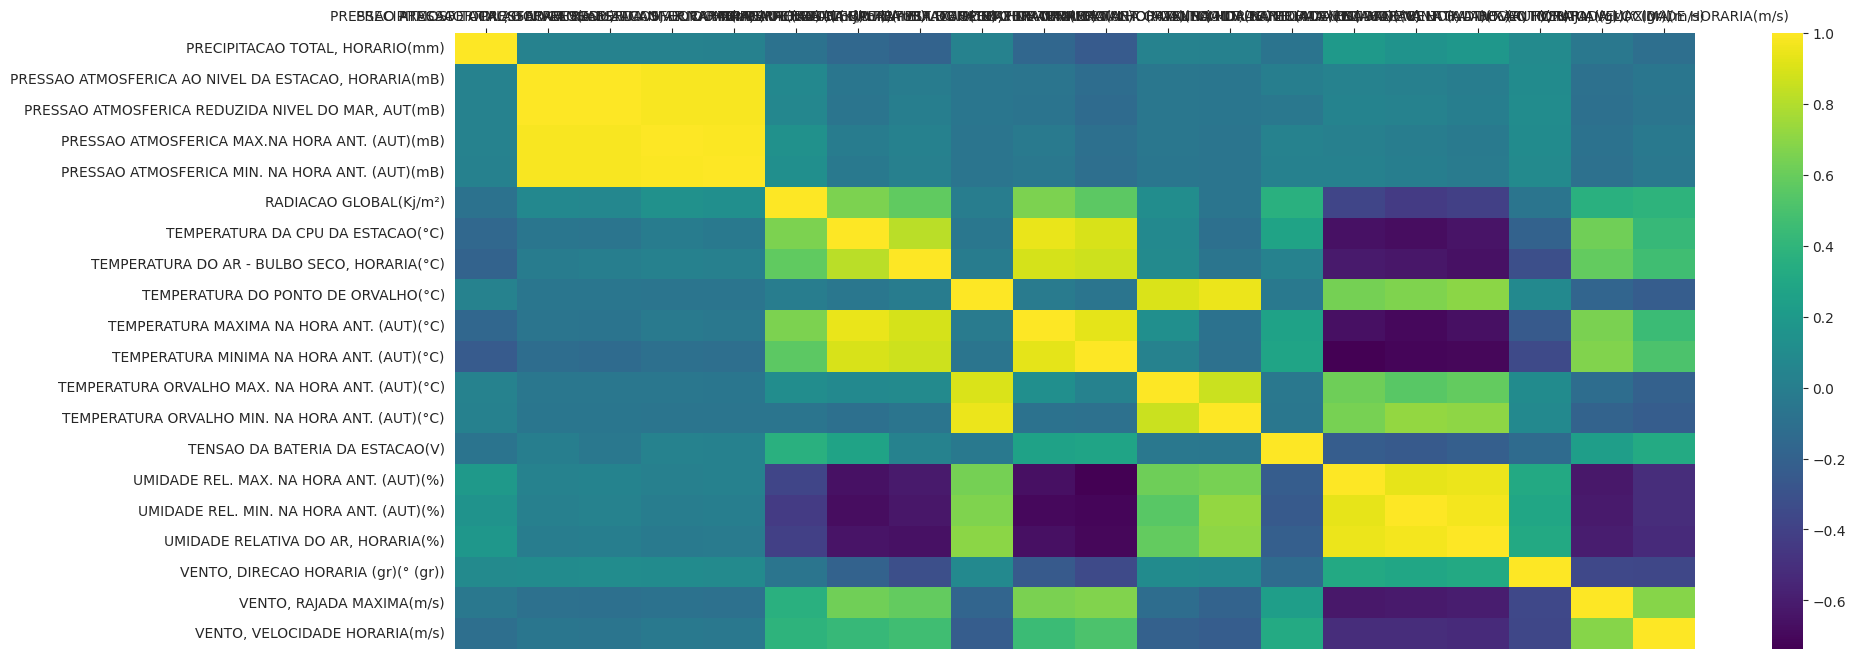

In [9]:
import seaborn as sb
plt.figure(figsize = (20, 8))
sb.set_style("white")
sb.color_palette("viridis", as_cmap=True)
plot = sns.heatmap(df_interpolado.corr(),cmap = 'viridis',annot = False,fmt = '.2f')
plot.xaxis.tick_top()
plt.savefig('heatmapatt.png')
plt.show()

In [10]:
df_interpolado['Data Medicao']= data

In [11]:
crudedf['Data Medicao'] = data 

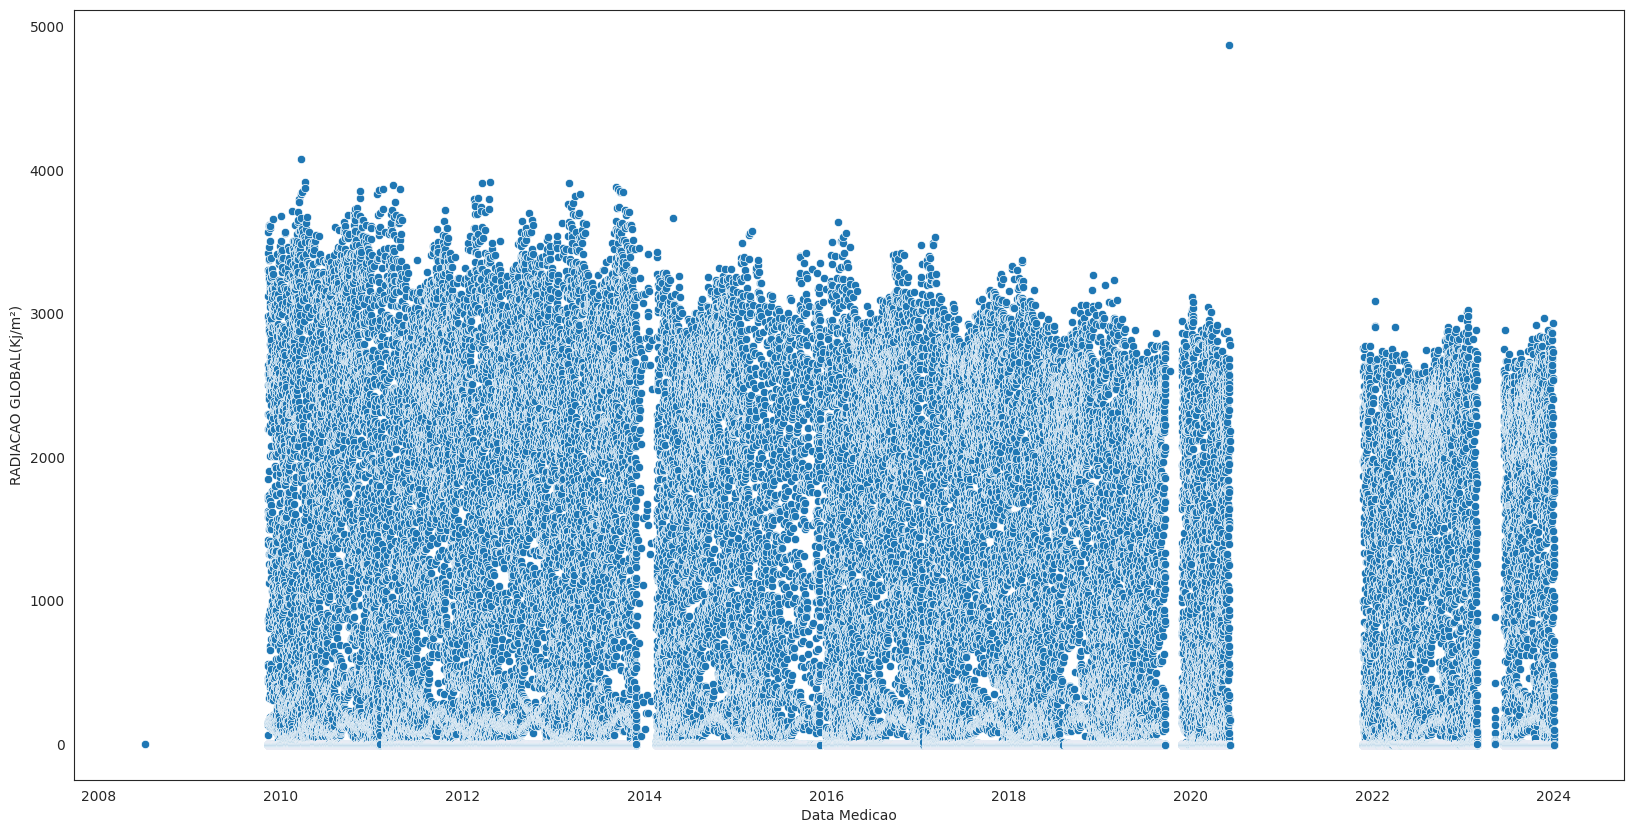

In [12]:
plt.figure(figsize = (20,10))
sns.scatterplot(x='Data Medicao',y="RADIACAO GLOBAL(Kj/m²)", data= crudedf)
plt.savefig('radiacao.png')
plt.show()

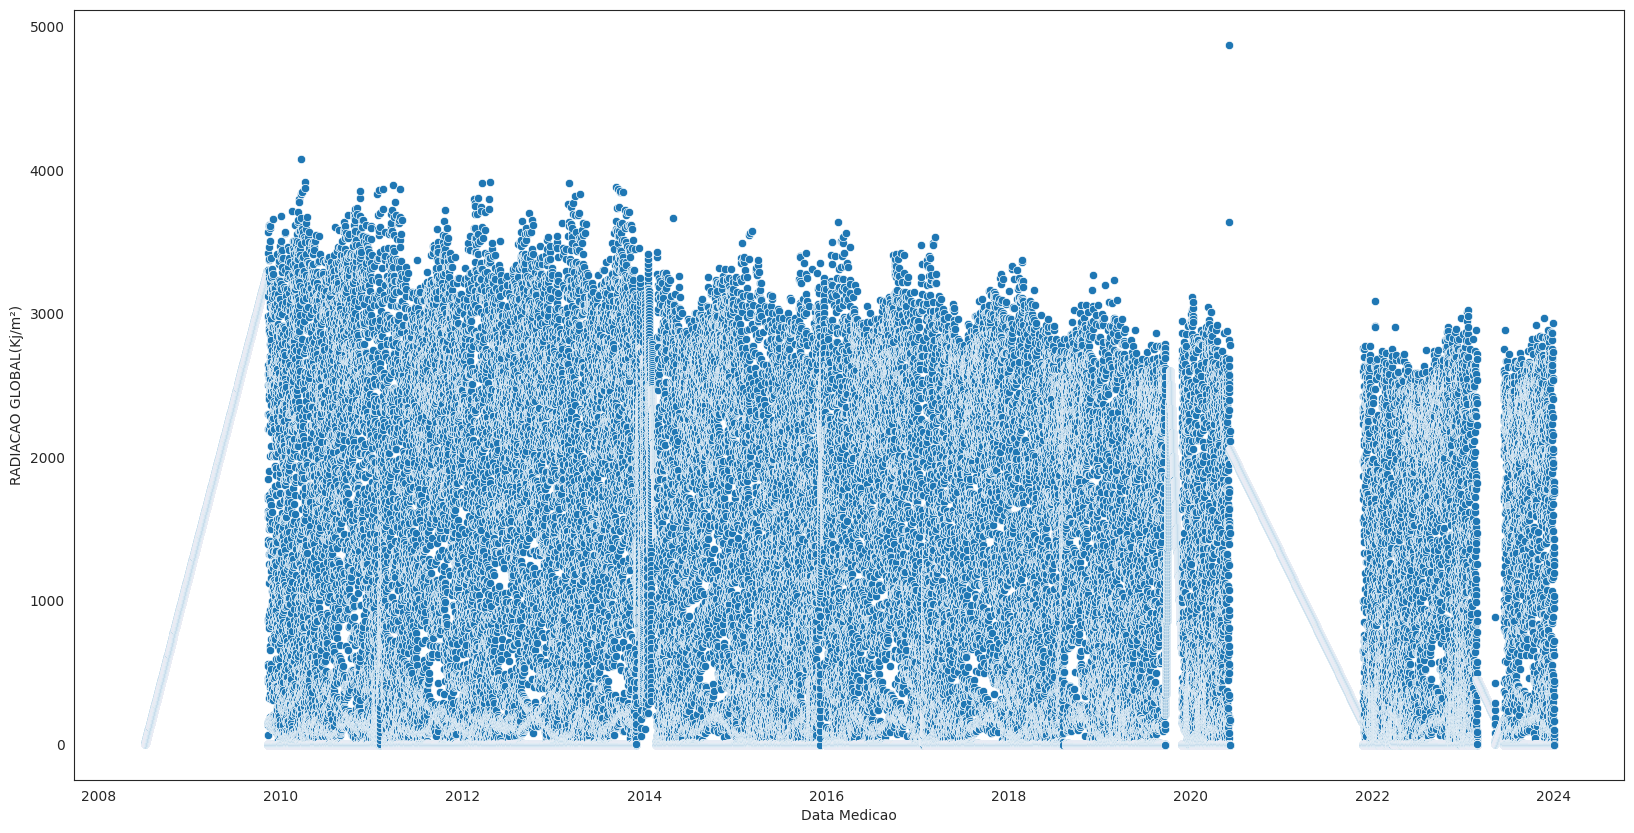

In [13]:
plt.figure(figsize = (20,10))
sns.scatterplot(x='Data Medicao',y="RADIACAO GLOBAL(Kj/m²)", data= df_interpolado)
plt.savefig('radiacao.png')
plt.show()

In [14]:
crudedf['Data Medicao']= data

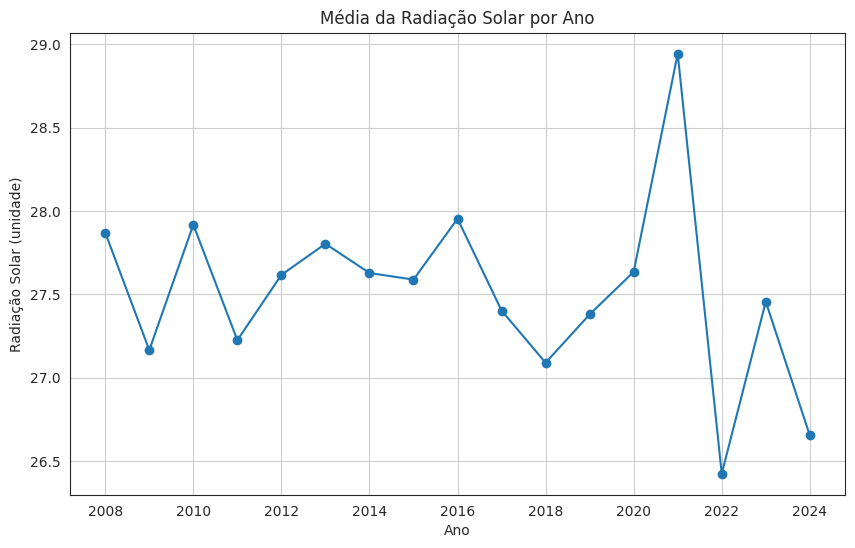

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que sua coluna de data é chamada 'Data' e a coluna de radiação solar é 'RadiacaoSolar'
# Substitua esses nomes de coluna pelos reais em seu DataFrame
df = df_interpolado
# 1. Converter a coluna de data para o tipo datetime, se necessário
df['Data'] = pd.to_datetime(df['Data Medicao'])

# 2. Extrair o ano da data
df['Ano'] = df['Data'].dt.year

# 3. Agrupar por ano e calcular a média da radiação solar
rad_media_por_ano = df.groupby('Ano')['TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)'].mean()

# 4. Plotar
plt.figure(figsize=(10, 6))
plt.plot(rad_media_por_ano.index, rad_media_por_ano.values, marker='o', linestyle='-')
plt.title('Média da Radiação Solar por Ano')
plt.xlabel('Ano')
plt.ylabel('Radiação Solar (unidade)')
plt.grid(True)
plt.show()

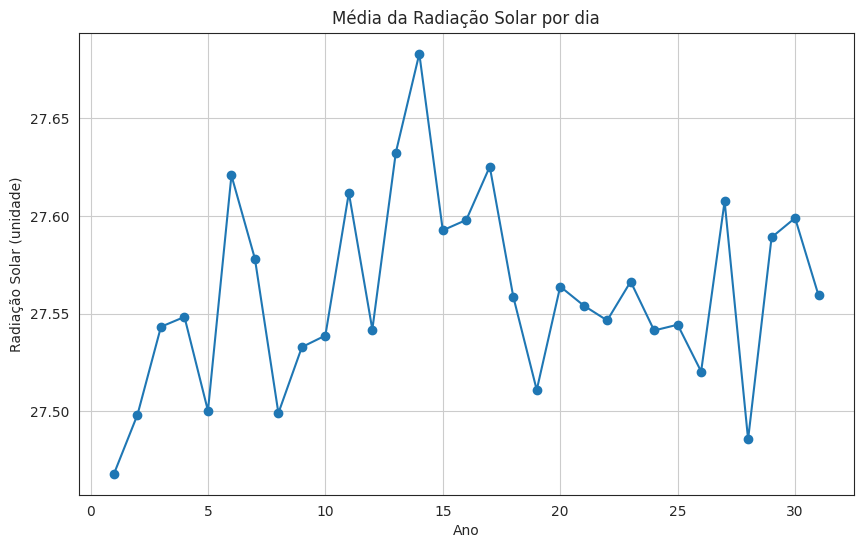

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que sua coluna de data é chamada 'Data' e a coluna de radiação solar é 'RadiacaoSolar'
# Substitua esses nomes de coluna pelos reais em seu DataFrame
df = df_interpolado
# 1. Converter a coluna de data para o tipo datetime, se necessário
df['Data'] = pd.to_datetime(df['Data Medicao'])

# 2. Extrair o ano da data
df['Dia'] = df['Data'].dt.day
# 3. Agrupar por ano e calcular a média da radiação solar
rad_media_por_ano = df.groupby('Dia')['TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)'].mean()

# 4. Plotar
plt.figure(figsize=(10, 6))
plt.plot(rad_media_por_ano.index, rad_media_por_ano.values, marker='o', linestyle='-')
plt.title('Média da Radiação Solar por dia')
plt.xlabel('Ano')
plt.ylabel('Radiação Solar (unidade)')
plt.grid(True)
plt.show()

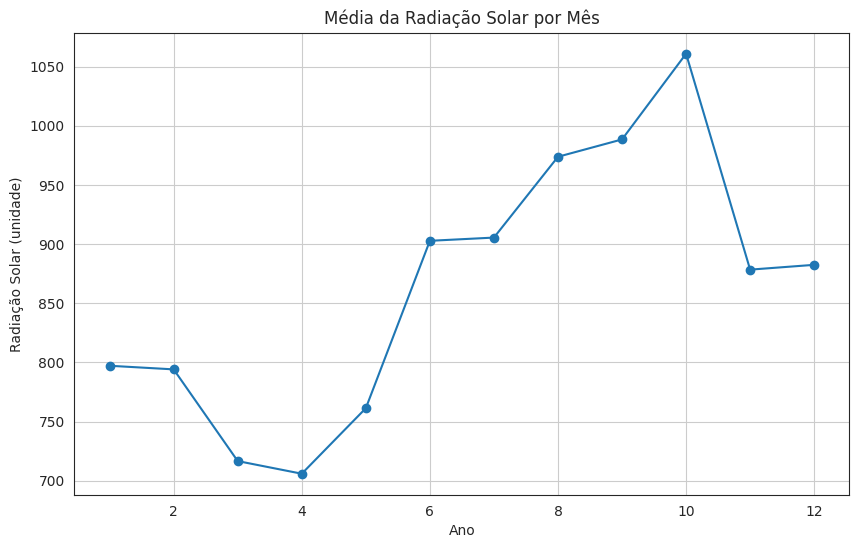

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que sua coluna de data é chamada 'Data' e a coluna de radiação solar é 'RadiacaoSolar'
# Substitua esses nomes de coluna pelos reais em seu DataFrame
df = df_interpolado
# 1. Converter a coluna de data para o tipo datetime, se necessário
df['Data'] = pd.to_datetime(df['Data Medicao'])

# 2. Extrair o ano da data
df['Dia'] = df['Data'].dt.month
# 3. Agrupar por ano e calcular a média da radiação solar
rad_media_por_ano = df.groupby('Dia')['RADIACAO GLOBAL(Kj/m²)'].mean()

# 4. Plotar
plt.figure(figsize=(10, 6))
plt.plot(rad_media_por_ano.index, rad_media_por_ano.values, marker='o', linestyle='-')
plt.title('Média da Radiação Solar por Mês')
plt.xlabel('Ano')
plt.ylabel('Radiação Solar (unidade)')
plt.grid(True)
plt.show()

In [18]:
df = df_interpolado

In [19]:
# Accessing year from the 'Data Medicao' column
df['Year'] = df['Data Medicao'].dt.year

# Accessing month from the 'Data Medicao' column
df['Month'] = df['Data Medicao'].dt.month

# Accessing day from the 'Data Medicao' column
df['Day'] = df['Data Medicao'].dt.day


In [20]:
df.drop(columns=['Data Medicao','Data'], inplace=True)

In [21]:
df.dropna(axis=0, inplace=True)

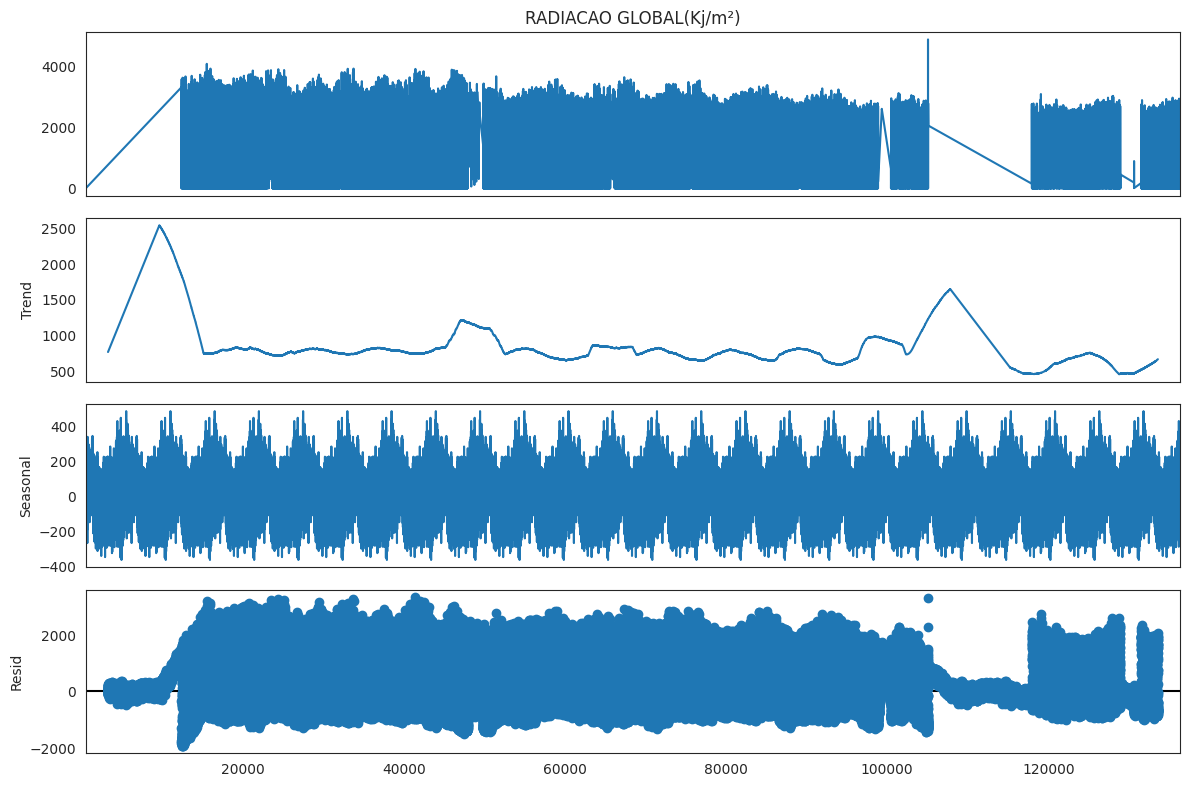

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
# ARIMAX models require univariate `endog`. Got shape (135791, 26).
# Output is truncated. View as a scrollable element or open
decomposition = seasonal_decompose(df['RADIACAO GLOBAL(Kj/m²)'], model='additive', period = 366 * 15 )  # decomposição anual
fig = decomposition.plot()
fig.set_size_inches(12, 8)
# fig.suptitle('Decomposição da Série Temporal', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

/home/jaca/codespaces/labsolarvenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/jaca/codespaces/labsolarvenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/jaca/codespaces/labsolarvenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/jaca/codespaces/labsolarvenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/jaca/codespaces/labsolarvenv/lib/python3.11/site-packages/

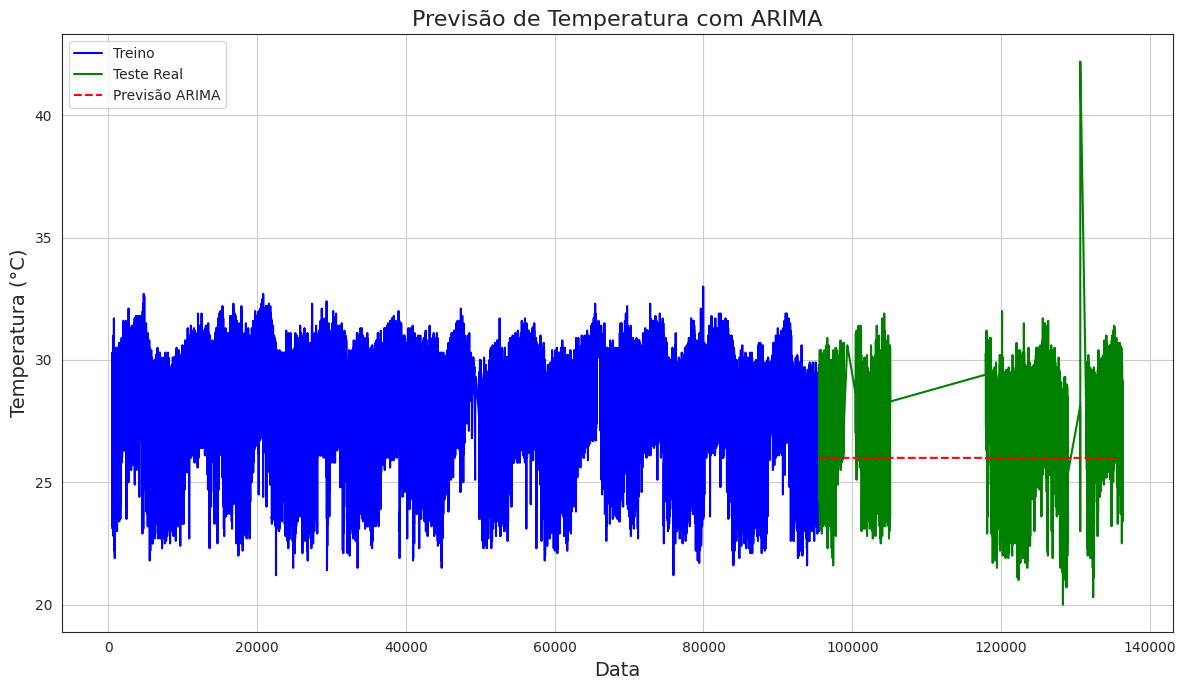

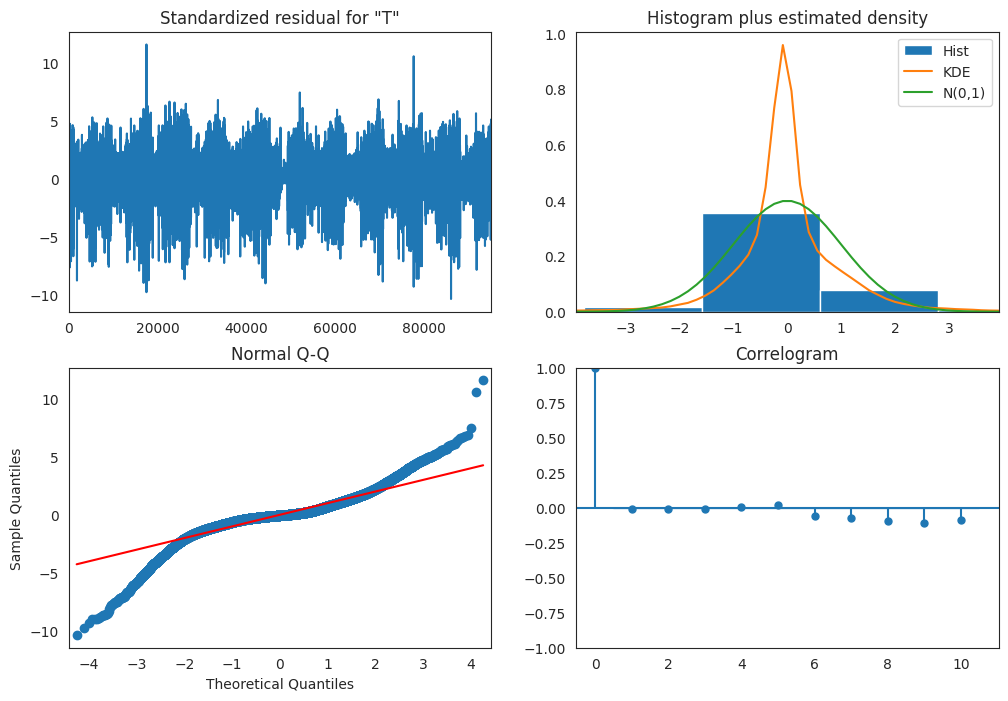

In [23]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'df' is your DataFrame containing the data
# Calculate the index to split the data
split_index = int(len(df) * 0.7)

# Splitting the data into training and testing sets
train = df.iloc[:split_index]
test = df.iloc[split_index:]

# Modelagem ARIMA
target_column = 'TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)'
model = ARIMA(train[target_column], order=(5, 1, 0))
fit = model.fit()

# Previsão
forecast = fit.forecast(steps=len(test))  # Forecasting for the length of the test set
df_forecast = pd.DataFrame(data={"Forecast": forecast}, index=test.index)

# Visualização
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
plt.plot(train[target_column], label="Treino", color='blue')
plt.plot(test[target_column], label="Teste Real", color='green')
plt.plot(df_forecast, label="Previsão ARIMA", linestyle="--", color='red')
plt.title("Previsão de Temperatura com ARIMA", fontsize=16)
plt.xlabel("Data", fontsize=14)
plt.ylabel("Temperatura (°C)", fontsize=14)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Diagnóstico
fit.plot_diagnostics(figsize=(12, 8))
plt.show()


/home/jaca/codespaces/labsolarvenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/jaca/codespaces/labsolarvenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/jaca/codespaces/labsolarvenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/jaca/codespaces/labsolarvenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/jaca/codespaces/labsolarvenv/lib/python3.11/site-packages/

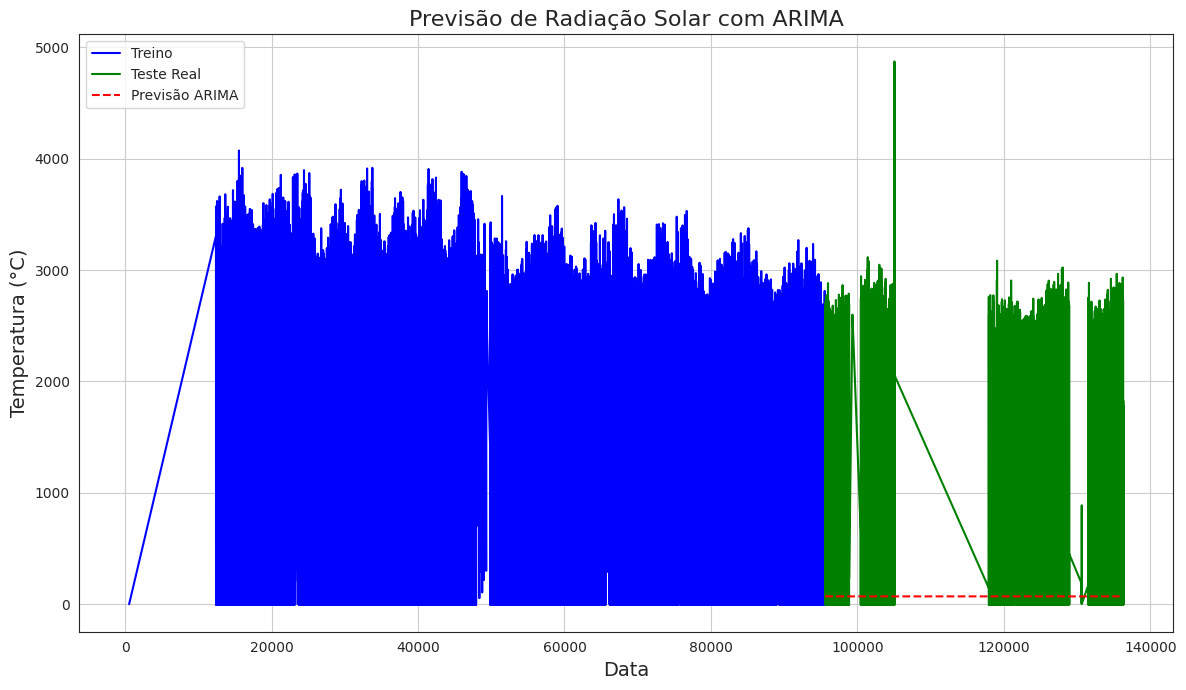

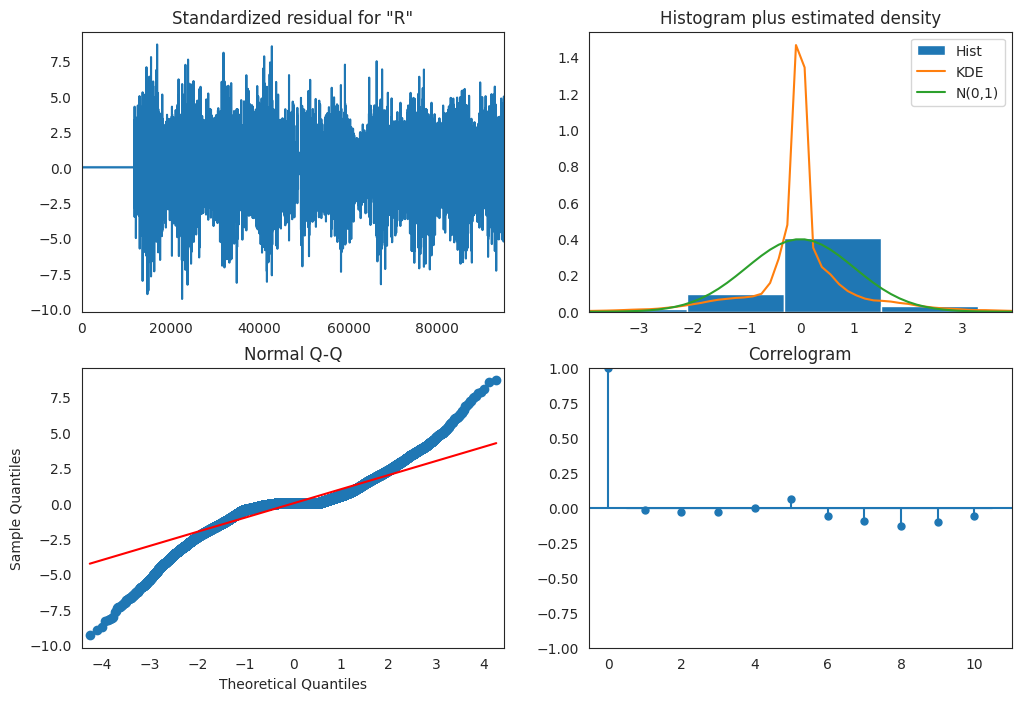

In [24]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'df' is your DataFrame containing the data
# Calculate the index to split the data
split_index = int(len(df) * 0.7)

# Splitting the data into training and testing sets
train = df.iloc[:split_index]
test = df.iloc[split_index:]

# Modelagem ARIMA
target_column = 'RADIACAO GLOBAL(Kj/m²)'
model = ARIMA(train[target_column], order=(5, 1, 0))
fit = model.fit()

# Previsão
forecast = fit.forecast(steps=len(test))  # Forecasting for the length of the test set
df_forecast = pd.DataFrame(data={"Forecast": forecast}, index=test.index)

# Visualização
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
plt.plot(train[target_column], label="Treino", color='blue')
plt.plot(test[target_column], label="Teste Real", color='green')
plt.plot(df_forecast, label="Previsão ARIMA", linestyle="--", color='red')
plt.title("Previsão de Radiação Solar com ARIMA", fontsize=16)
plt.xlabel("Data", fontsize=14)
plt.ylabel("Temperatura (°C)", fontsize=14)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Diagnóstico
fit.plot_diagnostics(figsize=(12, 8))
plt.show()

/home/jaca/codespaces/labsolarvenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/jaca/codespaces/labsolarvenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/jaca/codespaces/labsolarvenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/jaca/codespaces/labsolarvenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/jaca/codespaces/labsolarvenv/lib/python3.11/site-packages/

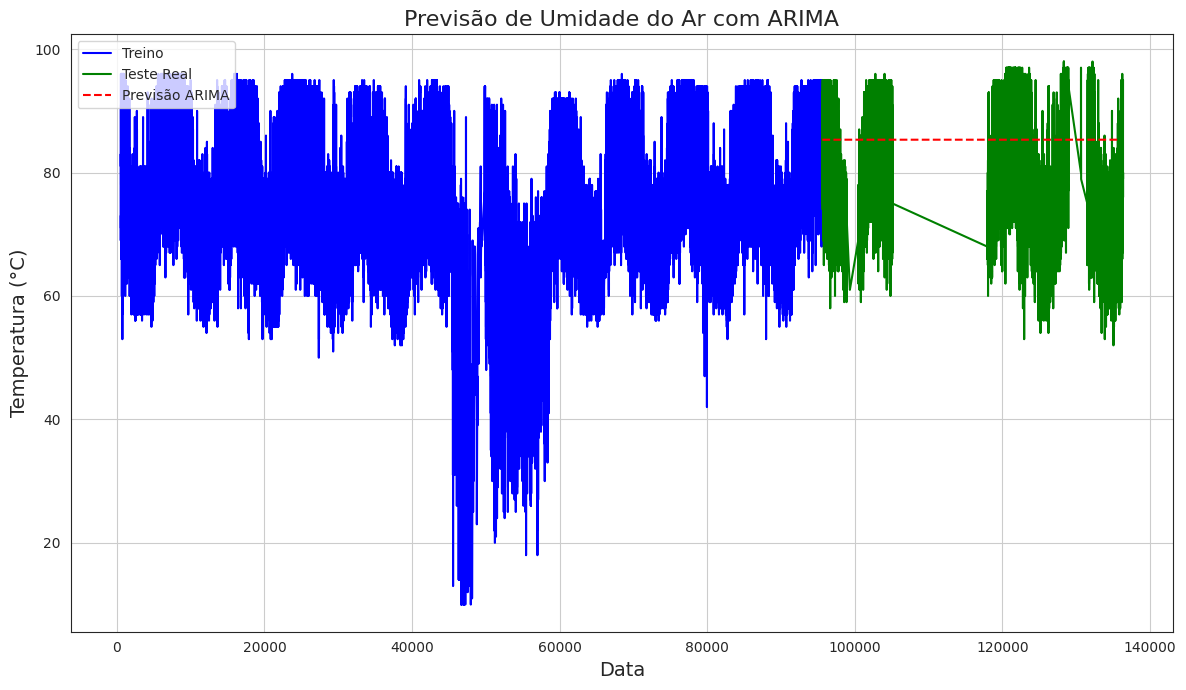

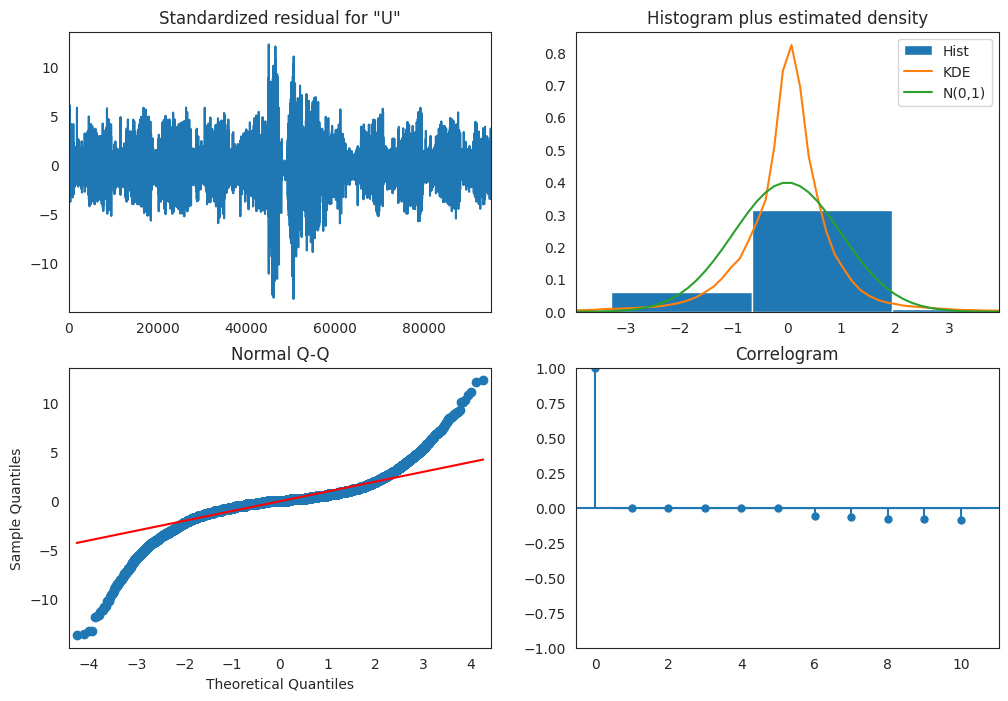

In [25]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'df' is your DataFrame containing the data
# Calculate the index to split the data
split_index = int(len(df) * 0.7)

# Splitting the data into training and testing sets
train = df.iloc[:split_index]
test = df.iloc[split_index:]

# Modelagem ARIMA
target_column = 'UMIDADE RELATIVA DO AR, HORARIA(%)'
model = ARIMA(train[target_column], order=(5, 1, 0))
fit = model.fit()

# Previsão
forecast = fit.forecast(steps=len(test))  # Forecasting for the length of the test set
df_forecast = pd.DataFrame(data={"Forecast": forecast}, index=test.index)

# Visualização
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
plt.plot(train[target_column], label="Treino", color='blue')
plt.plot(test[target_column], label="Teste Real", color='green')
plt.plot(df_forecast, label="Previsão ARIMA", linestyle="--", color='red')
plt.title("Previsão de Umidade do Ar com ARIMA", fontsize=16)
plt.xlabel("Data", fontsize=14)
plt.ylabel("Temperatura (°C)", fontsize=14)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Diagnóstico
fit.plot_diagnostics(figsize=(12, 8))
plt.show()

In [26]:
from statsmodels.tsa.arima.model import ARIMA

# Divisão de treino e teste
train = df[:-12]  
test = df[-12:]

# Modelagem ARIMA
model = ARIMA(train, order=(5,1,0))
fit = model.fit()

# Previsão
forecast = fit.forecast(steps=12)[0]
df_forecast = pd.DataFrame(data={"Forecast": forecast}, index=test.index)

# Visualização
plt.figure(figsize=(12, 7))
plt.plot(train, label="Treino", color='blue')
plt.plot(test, label="Teste Real", color='green')
plt.plot(df_forecast, label="Previsão ARIMA", linestyle="--", color='red')
plt.title("Previsão de Vendas Semanais com ARIMA", fontsize=16)
plt.xlabel("Data", fontsize=14)
plt.ylabel("Vendas", fontsize=14)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Diagnóstico
fit.plot_diagnostics(figsize=(12, 8))
plt.show()

/home/jaca/codespaces/labsolarvenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ValueError: SARIMAX models require univariate `endog`. Got shape (135791, 25).

In [ ]:
features = ['TEMPERATURA DO PONTO DE ORVALHO(°C)','VENTO, VELOCIDADE HORARIA(m/s)', 'UMIDADE RELATIVA DO AR, HORARIA(%)', 'TEMPERATURA DO AR - BULBO SECO, HORARIA(°C)']
target = ['RADIACAO GLOBAL(Kj/m²)']
dataframe = df_interpolado
X = dataframe[features].values
y = dataframe[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scalers #

In [ ]:
scaler = [StandardScaler(),
          QuantileTransformer(output_distribution="uniform", random_state=42),
          PowerTransformer(method="yeo-johnson"),
          MinMaxScaler()]

In [ ]:
X_train_scaled = scaler[0].fit_transform(X_train)
X_test_scaled = scaler[0].transform(X_test)

In [ ]:
X_train = X_train.ravel()
y_train= y_train.ravel()
X_train = X_train.reshape(-1,1)
y_train= y_train.reshape(-1,1)
X_train.shape, y_train.shape

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(2, 3), activation='relu', max_iter= 2000, random_state=42)
mlp.fit(X_train_scaled, y_train)
predictions = mlp.predict(X_test_scaled)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')